In [8]:
!pip install tf-nightly

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 MB 1.8 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.4/439.4 kB 8.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for jax: filename=jax-0.4.1-py3-none-any.whl size=1332462 sha256=35ee675d010cf71dde44f66fa6b51cc9ab72d8590fa85854dd60c0b658992142
  Stored in directory: /private/var/

In [1]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

: 

: 

In [2]:
imgs_path = "/Users/rohittiwari/Desktop/vgg_image-net/data/Apparel/Boys/Images/images_with_product_ids"
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 10

In [3]:
vgg_model = vgg16.VGG16(weights='imagenet')

feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
files = [imgs_path + "/" + x for x in os.listdir(imgs_path) if "jpg" in x]
print("number of images:",len(files))

number of images: 759


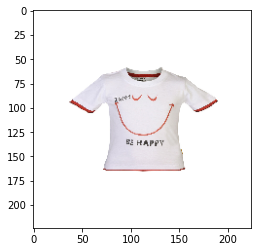

image loaded successfully!


In [5]:
original = load_img(files[4], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [6]:
numpy_image = img_to_array(original)

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

image batch size (1, 224, 224, 3)


In [7]:
processed_image = preprocess_input(image_batch.copy())
img_features = feat_extractor.predict(processed_image)

print("number of image features:",img_features.size)
img_features

number of image features: 4096


array([[0.      , 0.      , 0.      , ..., 0.      , 2.294174, 0.      ]],
      dtype=float32)

In [8]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)

In [9]:
images = np.vstack(importedImages)
processed_imgs = preprocess_input(images.copy())
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
print("number of image features:",imgs_features.size)
imgs_features.shape

features successfully extracted!
number of image features: 3108864


(759, 4096)

In [10]:
cosSimilarities = cosine_similarity(imgs_features)
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)

In [11]:
def retrieve_most_similar_products(given_img):
    print("original product:")
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("most similar products:")
    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

original product:


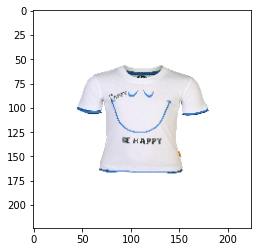

most similar products:


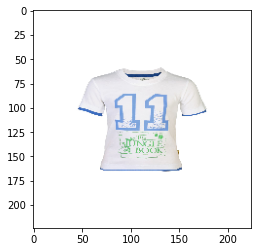

similarity score :  0.89567703


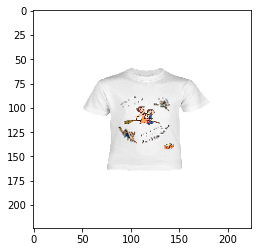

similarity score :  0.86114293


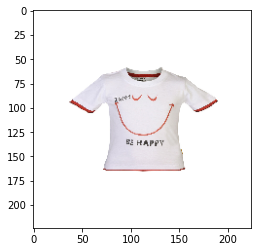

similarity score :  0.8491283


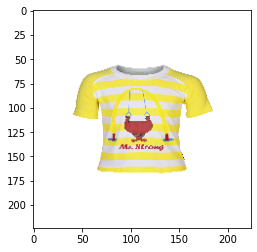

similarity score :  0.8267071


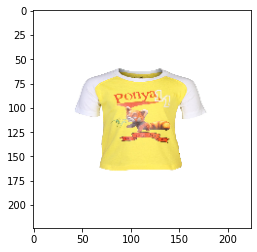

similarity score :  0.82649493


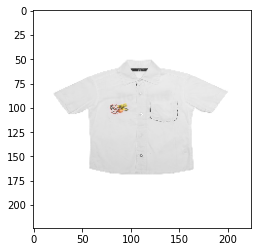

similarity score :  0.8164634


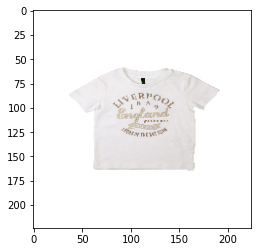

similarity score :  0.8011307


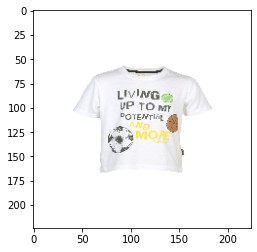

similarity score :  0.8006496


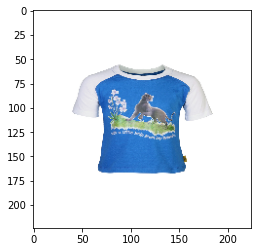

similarity score :  0.7988061


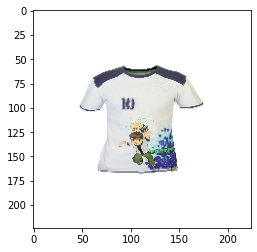

similarity score :  0.7943361


In [12]:
retrieve_most_similar_products(files[45])

original product:


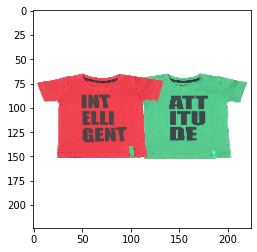

most similar products:


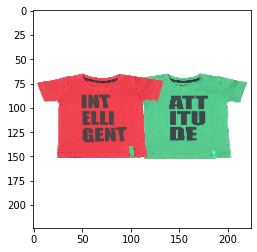

similarity score :  1.0


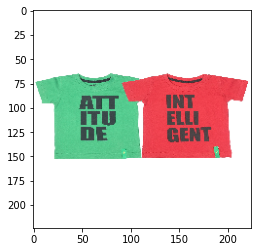

similarity score :  0.97804976


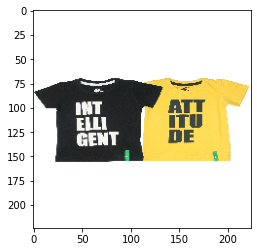

similarity score :  0.8498988


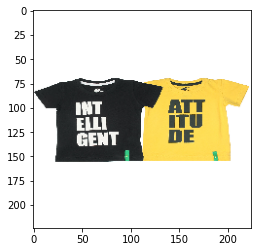

similarity score :  0.83881044


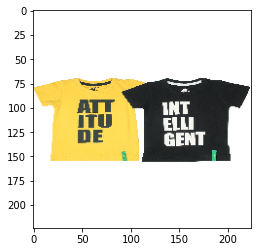

similarity score :  0.7984794


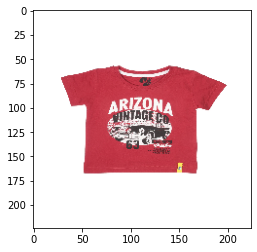

similarity score :  0.6904006


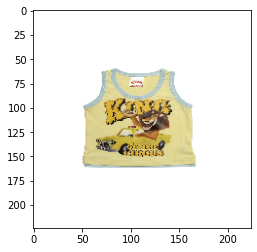

similarity score :  0.68780136


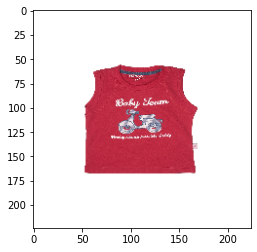

similarity score :  0.6876699


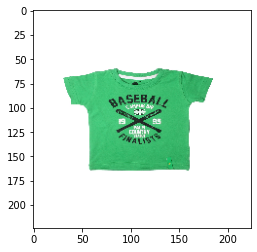

similarity score :  0.6861256


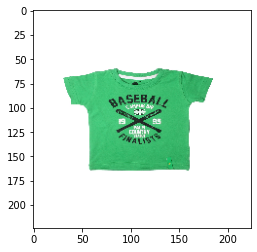

similarity score :  0.6861256


In [13]:
retrieve_most_similar_products (files[90])

In [15]:
import tensorflow as tf

In [16]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    feat_extractor,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /var/folders/1f/pw3_385d48j5lr825977jpw00000gn/T/1



2022-07-04 00:09:06.666522: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/1f/pw3_385d48j5lr825977jpw00000gn/T/1/assets

Saved model:
total 680
drwxr-xr-x  2 rohittiwari  staff      64 Jul  4 00:09 assets
-rw-r--r--  1 rohittiwari  staff   51647 Jul  4 00:09 keras_metadata.pb
-rw-r--r--  1 rohittiwari  staff  291976 Jul  4 00:09 saved_model.pb
drwxr-xr-x  4 rohittiwari  staff     128 Jul  4 00:09 variables


In [17]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 224, 224, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['fc2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 4096)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Defined Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          input_1: TensorSpe

NameError: name '__file__' is not defined